In [13]:
from diffusers import DDPMPipeline

In [14]:
ddpm = DDPMPipeline.from_pretrained('google/ddpm-celebahq-256')

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/computer/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /home/computer/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [15]:
image = ddpm(num_inference_steps=30).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

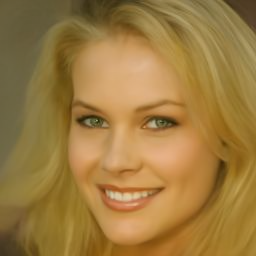

In [16]:
image

In [17]:
from diffusers import DDPMScheduler, UNet2DModel

In [18]:
scheduler = DDPMScheduler.from_pretrained('google/ddpm-celebahq-256')

In [19]:
model = UNet2DModel.from_pretrained('google/ddpm-celebahq-256')

An error occurred while trying to fetch google/ddpm-celebahq-256: google/ddpm-celebahq-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [20]:
scheduler.set_timesteps(50)

In [21]:
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [22]:
import torch

In [23]:
sample_size = model.config.sample_size

In [24]:
sample_size

256

In [25]:
noise = torch.randn((1,3,sample_size,sample_size))

In [26]:
noise

tensor([[[[-0.7516, -0.3361,  0.1934,  ..., -1.5462,  0.1097, -0.9239],
          [-0.8213, -1.0739,  1.9529,  ...,  0.1655,  1.6557, -0.2875],
          [ 1.0085, -1.3520,  0.4100,  ...,  0.2119, -0.4643,  0.3675],
          ...,
          [-0.5461,  1.9221, -1.9601,  ...,  2.4995, -0.3671, -1.0140],
          [ 1.0394, -0.5376, -0.3574,  ...,  0.4030,  2.1788, -1.3079],
          [-0.4560,  0.9785,  0.1538,  ..., -0.9526, -1.7638,  1.5556]],

         [[-0.4822, -0.4246, -0.1707,  ..., -0.0253,  0.8304,  0.6773],
          [ 0.7080,  1.3566, -0.3919,  ...,  1.0147,  1.1625,  1.5724],
          [ 0.6798,  0.3999, -0.9237,  ..., -0.8548, -0.3702,  1.9290],
          ...,
          [-1.1415,  0.1710, -0.5580,  ..., -0.0432,  0.4885, -0.4843],
          [-0.9663, -0.9200, -0.8206,  ..., -0.2635, -0.5975,  0.3899],
          [-0.5543,  0.3218, -0.5263,  ...,  0.3567,  1.6316, -0.2608]],

         [[ 0.0046, -1.2199, -0.4245,  ...,  0.5046, -0.6655,  0.1593],
          [-2.0013,  1.4553, -

In [38]:
input = noise

In [39]:
for t in scheduler.timesteps:
    with torch.no_grad():
        noise_residual = model(input,t).sample
    previous_sample = scheduler.step(noise_residual,t,input).prev_sample
    input = previous_sample

In [40]:
from PIL import Image
import numpy as np

In [41]:
image = (input /2 +0.5).clamp(0,1).squeeze()

In [42]:
image = (image.permute(1,2,0)*255).round().to(torch.uint8).cpu().numpy()

In [44]:
image = Image.fromarray(image)

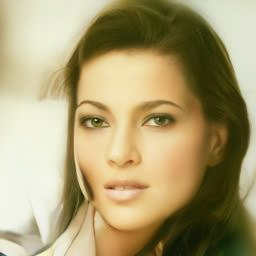

In [45]:
image